# Informe estadístico acerca de los parquets de taxis de NYC para Enero de 2025

**Libreria Polars**

**Actividades ha realizar**

Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis  
Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero  
Qué tipo de taxi recibe más propinas en promedio  
Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi    
Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero  
Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio


**1- Importar la libreria.**

In [21]:
import polars as pl

**2.- Carga de los Datasets**

*Al inicio del análisis, intenté cargar los datasets completos de taxis utilizando la siguiente instrucción:*

yellow_df = pl.read_parquet(ruta + "yellow_tripdata_2025-01.parquet")  
green_df = pl.read_parquet(ruta + "green_tripdata_2025-01.parquet")  
fhv_df = pl.read_parquet(ruta + "fhv_tripdata_2025-01.parquet")  
fhvhv_df = pl.read_parquet(ruta + "fhvhv_tripdata_2025-01.parquet")  

Sin embargo, esto provocó que el entorno se congelara o cerrara de forma inesperada, debido a que los archivos .parquet contienen una gran cantidad de columnas y registros, lo cual saturó la memoria del equipo.

Para evitar estos errores adopté una solución más eficiente: cargar únicamente las columnas necesarias para el análisis estadístico requerido. Las columnas las encontré realizando el mismo notebook pero en google colab que si me permitió revisar las columnas con read_parquet y asi poder tomar solo las que necesito para este código.


In [22]:
yellow_df = pl.read_parquet(
    "../data/taxi/yellow_tripdata_2025-01.parquet",
    columns=["tpep_pickup_datetime", "total_amount", "trip_distance", "tip_amount", "tolls_amount"]
)

green_df = pl.read_parquet(
    "../data/taxi/green_tripdata_2025-01.parquet",
    columns=["lpep_pickup_datetime", "total_amount", "trip_distance", "tip_amount", "tolls_amount"]
)

fhvhv_df = pl.read_parquet(
    "../data/taxi/fhvhv_tripdata_2025-01.parquet",
    columns=["pickup_datetime", "base_passenger_fare", "trip_miles", "tips", "tolls"]
)

fhv_df = pl.read_parquet(
    "../data/taxi/fhv_tripdata_2025-01.parquet",
    columns=["pickup_datetime"]
)


# Familiarización con los datasets (columnas y tipos)

Identificar que columna representa:  
Fecha/hora de recogida  
Ingresos brutos  
Distancia recorrida  
Propina  
Importe de peajes

In [23]:
print("*** Yellow Taxi ***")
print(yellow_df.schema)

*** Yellow Taxi ***
Schema([('tpep_pickup_datetime', Datetime(time_unit='us', time_zone=None)), ('total_amount', Float64), ('trip_distance', Float64), ('tip_amount', Float64), ('tolls_amount', Float64)])


Fecha/hora de recogida: *tpep_pickup_datetime*    
Ingresos brutos: *total_amount*  
Distancia recorrida: *trip_distance*  
Propina: *tip_amount*  
Importe de peajes: *tolls_amount*

In [24]:
print("*** Green Taxi ***")
print(green_df.schema)


*** Green Taxi ***
Schema([('lpep_pickup_datetime', Datetime(time_unit='us', time_zone=None)), ('total_amount', Float64), ('trip_distance', Float64), ('tip_amount', Float64), ('tolls_amount', Float64)])


Fecha/hora de recogida: *lpep_pickup_datetime*    
Ingresos brutos: *total_amount*  
Distancia recorrida: *trip_distance*  
Propina: *tip_amount*  
Importe de peajes: *tolls_amount*

In [25]:
print("*** FHV Taxi ***")
print(fhv_df.schema)

*** FHV Taxi ***
Schema([('pickup_datetime', Datetime(time_unit='us', time_zone=None))])


Fecha/hora de recogida: *pickup_datetime*    
Ingresos brutos: *x*  
Distancia recorrida: *x*  
Propina: *x*  
Importe de peajes: *x*

In [26]:
print("*** HVFHV Taxi ***")
print(fhvhv_df.schema)

*** HVFHV Taxi ***
Schema([('pickup_datetime', Datetime(time_unit='us', time_zone=None)), ('base_passenger_fare', Float64), ('trip_miles', Float64), ('tips', Float64), ('tolls', Float64)])


Fecha/hora de recogida: *pickup_datetime*  
Ingresos brutos: *base_passenger_fare*  
Distancia recorrida: *trip_miles*  
Propina: *tips*  
Importe de peajes: *tools*

# 1.- Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

In [27]:
# Ingresos brutos de cada taxi
avg_yellow = yellow_df.select(pl.col("total_amount").mean()).item()
# .select me ayuda a realizar las siguientes operaciones, devuelve un nuevo dataframe (por eso
# despues se usa item() para obtener un valor)
# pl.col("total_amount") es en donde selecciono la columna total_amount para este taxi
# .mean() calcula el promedio de la columna
# .item() devuelve el primer elemento de la serie que es el prom.
print(f"Promedio de ingresos brutos Yellow Taxi: {avg_yellow:.2f}")


Promedio de ingresos brutos Yellow Taxi: 25.61


In [28]:
avg_green = green_df.select(pl.col("total_amount").mean()).item()
print(f"Promedio de ingresos brutos Yellow Taxi: {avg_green:.2f}")

avg_hvfhv = fhvhv_df.select(pl.col("base_passenger_fare").mean()).item()
print(f"Promedio de ingresos brutos Yellow Taxi: {avg_hvfhv:.2f}")

Promedio de ingresos brutos Yellow Taxi: 22.63
Promedio de ingresos brutos Yellow Taxi: 24.27


**3.1 - Promedio general**

In [29]:
# Para el promedio general debo unificar las columnas de ingresos de los 3 df
# esto ya que cada tipo de taxi guarda sus ingresos en columnas con diferente nombre, el alias me ayudo para tener una sola columna común.

all_incomes = pl.concat([
    yellow_df.select(pl.col("total_amount").alias("ingreso")),
    green_df.select(pl.col("total_amount").alias("ingreso")),
    fhvhv_df.select(pl.col("base_passenger_fare").alias("ingreso"))  #aqui el problema, es la única que se llama diferente.
])

avg_general = all_incomes.select(pl.col("ingreso").mean()).item()

#Ya tenemos el promedio en avg_general

print(f"Promedio General: ${avg_general:.2f}")

Promedio General: $24.46


# Distancia total por tipo de taxi

In [30]:
# 1: Se debe calcular la distancia total recorrida por cada tipo de taxi

# trip_distance
yellow_distance = yellow_df.select(pl.col("trip_distance").sum()).item()
green_distance = green_df.select(pl.col("trip_distance").sum()).item()

# trip_miles
hvfhv_distance = fhvhv_df.select(pl.col("trip_miles").sum()).item()


In [31]:
print("Distancia total recorrida en enero:")
print(f"Taxi Amarillo:  {yellow_distance:.2f} millas") # le doy formato
print(f"Taxi Verde:     {green_distance:.2f} millas")
print(f"HVFHV:          {hvfhv_distance:.2f} millas")


Distancia total recorrida en enero:
Taxi Amarillo:  20347886.73 millas
Taxi Verde:     1040575.25 millas
HVFHV:          98978656.51 millas


# 2.- Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

In [32]:
#diccinario de las distancias.
distancias = {
    "Taxi Amarrillo": yellow_distance,
    "Taxi Verdeeen": green_distance,
    "HVFHV": hvfhv_distance
}

#usando la función max() puedo recorrer las claves del diccionario, y el argumento 'key=distancias.get' le indica a max() que
# compare las claves con base en sus valores (distancias). Asi max obtiene el valor máximo de esas distancias
tipo_max = max(distancias, key=distancias.get)
print(f"\nEl {tipo_max} recorrió más distancia.")


El HVFHV recorrió más distancia.


# 3.- Qué tipo de taxi recibe más propinas en promedio

In [33]:
# 1: Calculamos el promedio de propinas por tipo de taxi

# "tip_amount"
yellow_tip_avg = yellow_df.select(pl.col("tip_amount").mean()).item()
green_tip_avg = green_df.select(pl.col("tip_amount").mean()).item()

# "tips"
hvfhv_tip_avg = fhvhv_df.select(pl.col("tips").mean()).item()


print("Promedio de propinas:")
print(f"Taxi Amarillo:  ${yellow_tip_avg:.2f}")
print(f"Taxi Verde:     ${green_tip_avg:.2f}")
print(f"HVFHV:          ${hvfhv_tip_avg:.2f}")


print(f"\nEl taxi que recibe más propinas es el Taxi Amarillo")

# o lo puedo confirmar por si cambia algo en los datasets
propinas = {
    "Taxi Amarrillo": yellow_tip_avg,
    "Taxi Verde": green_tip_avg,
    "HVFHV": hvfhv_tip_avg
}
tipo_max_propina = max(propinas, key=propinas.get)
print(f"\nEl {tipo_max_propina} es el taxi que recibe más propinas en promedio: ")

Promedio de propinas:
Taxi Amarillo:  $2.96
Taxi Verde:     $2.48
HVFHV:          $1.04

El taxi que recibe más propinas es el Taxi Amarillo

El Taxi Amarrillo es el taxi que recibe más propinas en promedio: 


# 4.- Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi  
**Para poder realizarlo necesito importar matplotlib.**

In [34]:
%pip install matplotlib
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [35]:
# 1. Calcular el total de peajes por tipo de taxi
 # "tolls_amount"
yellow_tolls = yellow_df.select(pl.col("tolls_amount").sum()).item()
green_tolls = green_df.select(pl.col("tolls_amount").sum()).item()

#"tolls"
hvfhv_tolls = fhvhv_df.select(pl.col("tolls").sum()).item()


# Sirve crear una lista con los nombres de cada tipo de taxi ya que las puedo usar como valores X en el gráfico
tipos = ["TAxi Amarillo", "Taxi Verde", "HVFHV"]  #eje X

valores = [yellow_tolls, green_tolls, hvfhv_tolls]  # Valores numéricos paracada tipo


Gráficos:

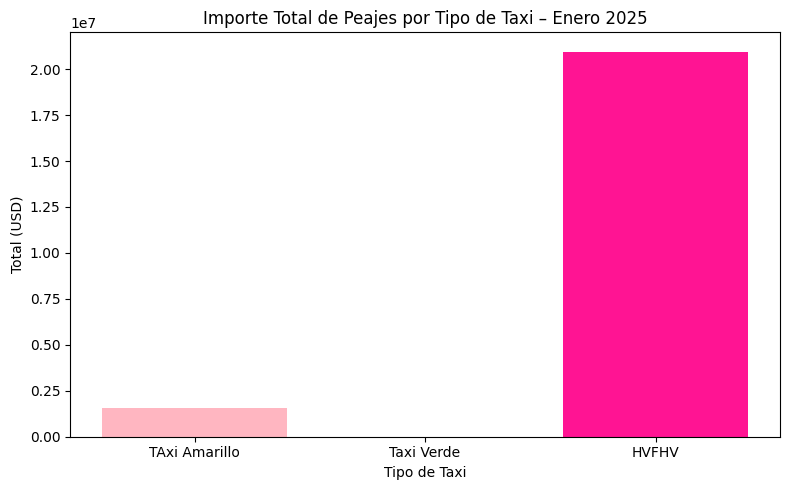

In [36]:
plt.figure(figsize=(8, 5)) #tamaño del gráfico
# Para dibujar las barras:
# plt.bar(lista_de_categorias (x), lista_de_valores (y), color=[colores_opcionales_cada_barra])
# lista_de_categorias -> etiquetas en el eje X
# lista_de_valores -> altura de cada barra (por ejemplo, peajes totales)
plt.bar(tipos, valores, color=["lightpink", "palevioletred", "deeppink"])  
plt.title("Importe Total de Peajes por Tipo de Taxi – Enero 2025")  # Título
plt.ylabel("Total (USD)")
plt.xlabel("Tipo de Taxi")
plt.tight_layout()#ajusta el tamaño, para que no se corte
plt.show()

# 5.- Mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

Para esto usaré la libreria seaborn ya que es para gráficos estadísticos, sobretodo mapas de calor y nuevamente  matplotlib.pyplot paraa los gráficos


In [37]:
%pip install seaborn
import seaborn as sns  #gráficos estadísticos
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [38]:
# 1.- Defino una función que recibirá el día, hora y etiqueta de tipo de taxi desde una columna de fecha.
# Esta función sirve para que pueda convertir la información de fecha/hora, que originalmente tiene  diferentes nombres en los
# dataFrames en un mismo formato.
# Así, no importa cual era su nombre original de la columna, todos los DataFrames ahora tendrán las mismas columnas:
# "datetime", "dia", "hora" y "tipo_taxi".
def extraer_dia_hora(df, col_fecha, fuente): # estamos recibiendo un dataframe. contienen la columna de fecha y el tipo de taxi
    return df.select([
        pl.col(col_fecha).cast(pl.Datetime).alias("datetime"),  #hacemos el alias por la diferencia de nombres.
    ]).with_columns([
        pl.col("datetime").dt.day().alias("dia"), # tomamos solo el número del día del mes
        pl.col("datetime").dt.hour().alias("hora"),  # "" la hora del día
        pl.lit(fuente).alias("tipo_taxi")    # usamos li para poder tener una columna con el nombre del tipo de taxi
    ])


In [39]:
# Aplicamos la función a cada DataFrame 
yellow_time = extraer_dia_hora(yellow_df, "tpep_pickup_datetime", "Yellow") 
green_time = extraer_dia_hora(green_df, "lpep_pickup_datetime", "Green")    
hvfhv_time = extraer_dia_hora(fhvhv_df, "pickup_datetime", "HVFHV")          

In [46]:
# Unimos los tres DataFrames en uno solo para analizar todos los taxis juntos
tiempo_total = pl.concat([yellow_time, green_time, hvfhv_time])

# Agrupamos por día y hora para contar cuántos viajes hubo en cada combinación
conteo = (
    tiempo_total
    .group_by(["dia", "hora"])
    .agg(pl.len().alias("viajes"))
    .pivot(index="dia", on="hora", values="viajes")  # <--- aquí el cambio
    .fill_null(0)
)

# Convertimos el DataFrame de Polars a pandas para graficar con seaborn
conteo_df = conteo.to_pandas().set_index("dia").sort_index()

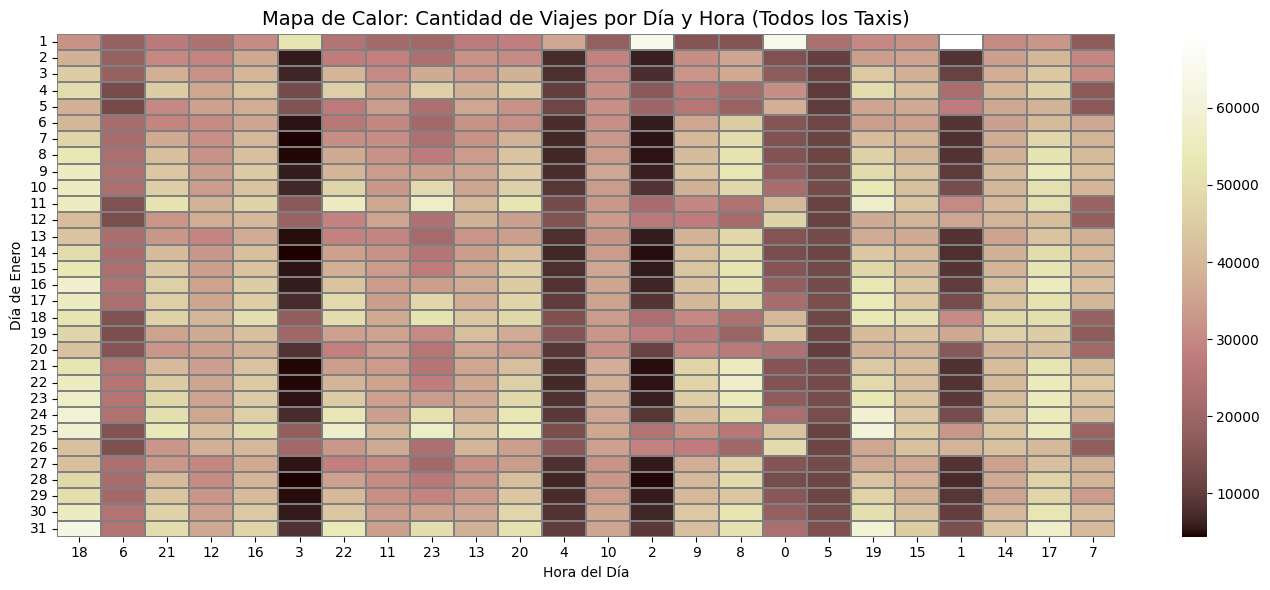

In [47]:

conteo_df = conteo.to_pandas().set_index("dia").sort_index()


plt.figure(figsize=(14, 6))  # Definimos el tamaño del gráfico
sns.heatmap(
    conteo_df,
    cmap="pink",             
    linewidths=0.3, #líneas internas
    linecolor='gray' # color de las líneas
)
plt.title("Mapa de Calor: Cantidad de Viajes por Día y Hora (Todos los Taxis)", fontsize=14)
plt.xlabel("Hora del Día")
plt.ylabel("Día de Enero")
plt.tight_layout()
plt.show()


# 6.- Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

In [48]:
# siguiendo la logica de la funcion anterior
def extraer_dia(df, col_fecha, tipo):
    return df.select([
        pl.col(col_fecha).cast(pl.Datetime).dt.day().alias("dia")  #etrae el día del mes (1-31)
    ]).with_columns([
        pl.lit(tipo).alias("tipo_taxi")  #crea una columna fija con el nombre del tipo de taxi
    ])


In [49]:
# se le aplica la función a todos los DataFrames
yellow_dia = extraer_dia(yellow_df, "tpep_pickup_datetime", "Yellow")
green_dia = extraer_dia(green_df, "lpep_pickup_datetime", "Green")
hvfhv_dia = extraer_dia(fhvhv_df, "pickup_datetime", "HVFHV")

In [51]:
#concatena todos los resultados para analizarlos juntos
dias_total = pl.concat([yellow_dia, green_dia, hvfhv_dia])

In [52]:
#agrup por tipo de taxi y día, y contamos la cantidad de viajes en cada combinación
conteo = (
    dias_total
    .group_by(["tipo_taxi", "dia"]) 
    .agg(pl.len().alias("viajes"))   # Usamos pl.len() en lugar de pl.count() porque se recomienda
    .pivot(index="tipo_taxi", on="dia", values="viajes")  # crea una matriz: filas = taxis, columnas = días
    .fill_null(0)  #rellena con 0 cuando no hubo viajes
)

In [53]:
#convierte el DataFrame de Polars a pandas porque Seaborn no acepta Polars directamente
conteo_df = conteo.to_pandas().set_index("tipo_taxi")  #'tipo_taxi' como índice para la gráfica

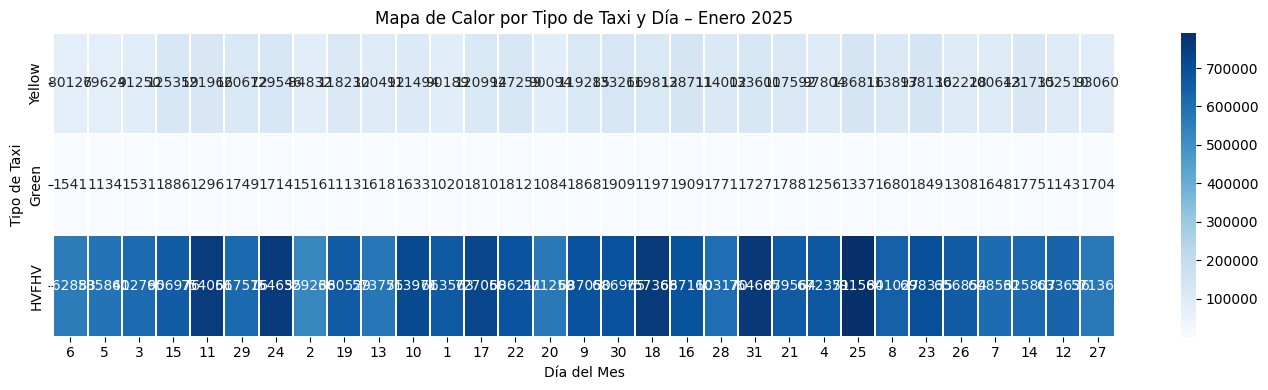

In [56]:
plt.figure(figsize=(14, 4))  
sns.heatmap(
    conteo_df,
    cmap="Blues",         
    annot=True,              
    fmt=".0f",               
    linewidths=0.3           
)
plt.title("Mapa de Calor por Tipo de Taxi y Día – Enero 2025") 
plt.xlabel("Día del Mes")  
plt.ylabel("Tipo de Taxi")  
plt.tight_layout() 
plt.show()  